In [7]:
%matplotlib notebook

In [8]:
# Beer Reviews Project

In [9]:
# Kaggle Data Source
#kaggle datasets download -d rdoume/beerreviews

In [10]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import mpl_scatter_density

In [11]:
# Importing resource file
beer_data = pd.read_csv('Resources/beer_reviews.csv')
# Displaying beer review dataframe, note, 1,586,614 rows and 13 columns
beer_data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [12]:
# # List of Unique beer styles
beer_styles = beer_data["beer_style"].unique()
print(beer_styles)
# Count of how many unique beer styles there are, 104
print(len(beer_styles))

# Count how many reviews there are for each style
beer_styles_count = beer_data["beer_style"].value_counts()
print(beer_styles_count)

# List of the Breweries and count, note 5,743 breweries
breweries = beer_data["brewery_name"].unique()
print(breweries)
print(len(breweries))

# DataFrame grouped by brewery, note, 23,756 rows
grouped_breweries = beer_data.groupby("brewery_name")
grouped_breweries.head()

#DataFrame grouped by beer styles, note, 520 rows
grouped_beer_style = beer_data.groupby("beer_style")
grouped_beer_style.head()

['Hefeweizen' 'English Strong Ale' 'Foreign / Export Stout'
 'German Pilsener' 'American Double / Imperial IPA' 'Herbed / Spiced Beer'
 'Light Lager' 'Oatmeal Stout' 'American Pale Lager' 'Rauchbier'
 'American Pale Ale (APA)' 'American Porter' 'Belgian Strong Dark Ale'
 'American IPA' 'American Stout' 'Russian Imperial Stout'
 'American Amber / Red Ale' 'American Strong Ale' 'Märzen / Oktoberfest'
 'American Adjunct Lager' 'American Blonde Ale' 'Euro Pale Lager'
 'English Brown Ale' 'Scotch Ale / Wee Heavy' 'Fruit / Vegetable Beer'
 'American Double / Imperial Stout' 'Belgian Pale Ale' 'English Bitter'
 'English Porter' 'Irish Dry Stout' 'American Barleywine'
 'Belgian Strong Pale Ale' 'Doppelbock' 'Maibock / Helles Bock'
 'Pumpkin Ale' 'Dortmunder / Export Lager' 'Euro Strong Lager'
 'Euro Dark Lager' 'Low Alcohol Beer' 'Weizenbock'
 'Extra Special / Strong Bitter (ESB)' 'Bock'
 'English India Pale Ale (IPA)' 'Altbier' 'Kölsch' 'Munich Dunkel Lager'
 'Rye Beer' 'American Pale Wheat A

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286723,35,Boston Beer Company (Samuel Adams),1300655413,4.0,5.0,4.5,tkepx182,Bière de Champagne / Bière Brut,3.0,4.0,Infinium,10.3,64089
286813,35,Boston Beer Company (Samuel Adams),1293958220,4.0,4.0,4.0,mvmalesci,Bière de Champagne / Bière Brut,4.0,3.5,Infinium,10.3,64089
295161,35,Boston Beer Company (Samuel Adams),1297041872,3.5,3.5,4.5,yemenmocha,Bière de Champagne / Bière Brut,3.5,3.5,Infinium,10.3,64089
295476,35,Boston Beer Company (Samuel Adams),1312391721,3.0,3.5,3.5,tdm168,Bière de Champagne / Bière Brut,3.0,3.0,Infinium,10.3,64089


In [13]:
# Searching for only Lagers
beer_data[beer_data["beer_style"].str.contains("Lager")]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
10,163,Amstel Brouwerij B. V.,1010963392,3.0,2.0,3.0,fodeeoz,Light Lager,2.5,2.5,Amstel Light,3.5,436
17,1075,Caldera Brewing Company,1062311123,4.0,3.0,4.0,beerguy101,American Pale Lager,4.0,4.0,Caldera OBF 15,5.6,12386
18,163,Amstel Brouwerij B. V.,1010861086,2.5,3.0,3.0,jdhilt,Light Lager,2.0,2.0,Amstel Light,3.5,436
30,163,Amstel Brouwerij B. V.,1002109880,3.0,2.0,2.0,xXTequila,Light Lager,2.0,3.0,Amstel Light,3.5,436
40,163,Amstel Brouwerij B. V.,988202869,3.0,3.0,3.0,Brent,Light Lager,2.0,2.0,Amstel Light,3.5,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586426,14359,The Defiant Brewing Company,1175010947,2.0,2.0,4.0,ArrogantB,American Amber / Red Lager,3.0,3.0,Muddy Creek Lager,5.6,36100
1586503,14359,The Defiant Brewing Company,1165710632,4.5,4.0,4.0,tgbljb,American Amber / Red Lager,4.5,4.5,Pearl River Lager,NaN,33901
1586504,14359,The Defiant Brewing Company,1164299834,4.5,3.5,4.5,cbl2,American Amber / Red Lager,4.5,4.0,Pearl River Lager,NaN,33901
1586566,14359,The Defiant Brewing Company,1268076132,4.0,4.0,4.0,plaid75,American Pale Lager,4.0,4.0,Prohibition Lager,NaN,49776


In [14]:
# Searching for only Lagers
beer_data[beer_data["beer_style"].str.contains("Ale")]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
63,1075,Caldera Brewing Company,1251327677,4.0,3.5,3.5,NJpadreFan,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.5,25414
64,1075,Caldera Brewing Company,1250928902,2.5,3.0,3.5,vacax,American Pale Ale (APA),3.5,2.5,Caldera Pale Ale,5.5,25414
65,1075,Caldera Brewing Company,1249866208,4.0,3.5,4.0,d0ggnate,American Pale Ale (APA),4.0,3.5,Caldera Pale Ale,5.5,25414
67,1075,Caldera Brewing Company,1249847121,4.5,3.5,4.0,babyhobbes,American Pale Ale (APA),3.5,4.0,Caldera Pale Ale,5.5,25414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [15]:
# Unique brew sytles broken up into Ale, Lager, or other.   
Ales = {'Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout','American Double / Imperial IPA', 'Oatmeal Stout', 
        'American Pale Ale (APA)', 'American Porter', 'Belgian Strong Dark Ale', 'American IPA', 'American Stout',
        'Russian Imperial Stout', 'American Amber / Red Ale', 'American Strong Ale', 'American Blonde Ale', 
        'English Brown Ale' 'Scotch Ale / Wee Heavy', 'American Double / Imperial Stout' 'Belgian Pale Ale', 
        'English Bitter', 'English Porter', 'Irish Dry Stout', 'Belgian Strong Pale Ale', 'Pumpkin Ale', 'Weizenbock', 
        'Extra Special / Strong Bitter (ESB)', 'English India Pale Ale (IPA)', 'American Pale Wheat Ale', 'Milk / Sweet Stout', 
        'Scottish Ale', 'American Black Ale', 'Saison / Farmhouse Ale', 'English Dark Mild Ale', 'English Pale Ale', 
        'Belgian IPA', 'Tripel', 'American Brown Ale', 'Dubbel', 'Flanders Red Ale', 'Roggenbier', 'Belgian Dark Ale', 
        'Bière de Garde', 'Irish Red Ale', 'English Stout', 'Cream Ale', 'American Wild Ale', 'Scottish Gruit / Ancient Herbed Ale',
       'Wheatwine', 'American Dark Wheat Ale', 'Baltic Porter', 'Kristalweizen', 'English Pale Mild Ale', 'Old Ale', 'Quadrupel (Quad)', 
       'Gose'}

Lagers = {'German Pilsener', 'Light Lager', 'American Pale Lager', 'Rauchbier', 'Märzen / Oktoberfest', 
          'American Adjunct Lager', 'Euro Pale Lager', 'American Barleywine', 'Doppelbock', 'Maibock / Helles Bock', 
          'Dortmunder / Export Lager', 'Euro Strong Lager', 'Euro Dark Lager', 'Bock', 'Munich Dunkel Lager', 
          'Schwarzbier', 'Vienna Lager', 'American Amber / Red Lager', 
          'Witbier', 'Czech Pilsener', 'Dunkelweizen', 'Keller Bier / Zwickel Bier', 'Japanese Rice Lager', 
          'American Double / Imperial Pilsner', 'Munich Helles Lager', 'Eisbock'}

Other = {'Herbed / Spiced Beer', 'Fruit / Vegetable Beer', 'Low Alcohol Beer', 'Altbier', 'Kölsch', 'Rye Beer', 
         'English Barleywine', 'California Common / Steam Beer', 'Flanders Oud Bruin', 'Winter Warmer', 'Smoked Beer', 'Black & Tan', 
        'Chile Beer', 'American Malt Liquor', 'Lambic - Fruit', 'Braggot', 'Lambic - Unblended', 'Berliner Weissbier', 'Kvass', 'Faro',
        'Gueuze', 'Happoshu', 'Sahti', 'Bière de Champagne / Bière Brut'}

In [16]:
# Copy of original dataframe for future use if required
beer_data_categ = beer_data.copy()
beer_data_categ.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [17]:
Beer_style_dictionary = {'Hefeweizen':'Ale', 'English Strong Ale':'Ale','Foreign / Export Stout':'Ale','American Double / Imperial IPA':'Ale', 'Oatmeal Stout':'Ale', 
        'American Pale Ale (APA)':'Ale', 'American Porter':'Ale', 'Belgian Strong Dark Ale':'Ale', 'American IPA':'Ale', 'American Stout':'Ale',
        'Russian Imperial Stout':'Ale', 'American Amber / Red Ale':'Ale', 'American Strong Ale':'Ale', 'American Blonde Ale':'Ale', 
        'English Brown Ale':'Ale', 'Scotch Ale / Wee Heavy':'Ale', 'American Double / Imperial Stout':'Ale', 'Belgian Pale Ale':'Ale', 
        'English Bitter':'Ale', 'English Porter':'Ale', 'Irish Dry Stout':'Ale', 'Belgian Strong Pale Ale':'Ale', 'Pumpkin Ale':'Ale', 'Weizenbock':'Ale', 
        'Extra Special / Strong Bitter (ESB)':'Ale', 'English India Pale Ale (IPA)':'Ale', 'American Pale Wheat Ale':'Ale', 'Milk / Sweet Stout':'Ale', 
        'Scottish Ale':'Ale', 'American Black Ale':'Ale', 'Saison / Farmhouse Ale':'Ale', 'English Dark Mild Ale':'Ale', 'English Pale Ale':'Ale', 
        'Belgian IPA':'Ale', 'Tripel':'Ale', 'American Brown Ale':'Ale', 'Dubbel':'Ale', 'Flanders Red Ale':'Ale', 'Roggenbier':'Ale', 'Belgian Dark Ale':'Ale', 
        'Bière de Garde':'Ale', 'Irish Red Ale':'Ale', 'English Stout':'Ale', 'Cream Ale':'Ale', 'American Wild Ale':'Ale', 'Scottish Gruit / Ancient Herbed Ale':'Ale',
       'Wheatwine':'Ale', 'American Dark Wheat Ale':'Ale', 'Baltic Porter':'Ale', 'Kristalweizen':'Ale', 'English Pale Mild Ale':'Ale', 'Old Ale':'Ale', 'Quadrupel (Quad)':'Ale', 
       'Gose':'Ale','German Pilsener':'Lager', 'Light Lager':'Lager', 'American Pale Lager':'Lager', 'Rauchbier':'Lager', 'Märzen / Oktoberfest':'Lager', 
          'American Adjunct Lager':'Lager', 'Euro Pale Lager':'Lager', 'American Barleywine':'Lager', 'Doppelbock':'Lager', 'Maibock / Helles Bock':'Lager', 
          'Dortmunder / Export Lager':'Lager', 'Euro Strong Lager':'Lager', 'Euro Dark Lager':'Lager', 'Bock':'Lager', 'Munich Dunkel Lager':'Lager', 
          'Schwarzbier':'Lager', 'Vienna Lager':'Lager', 'American Amber / Red Lager':'Lager', 
          'Witbier':'Lager', 'Czech Pilsener':'Lager', 'Dunkelweizen':'Lager', 'Keller Bier / Zwickel Bier':'Lager', 'Japanese Rice Lager':'Lager', 
          'American Double / Imperial Pilsner':'Lager', 'Munich Helles Lager':'Lager', 'Eisbock':'Lager', 'Herbed / Spiced Beer':'Other', 'Fruit / Vegetable Beer':'Other', 'Low Alcohol Beer':'Other', 'Altbier':'Other', 'Kölsch':'Other', 'Rye Beer':'Other', 
         'English Barleywine':'Other', 'California Common / Steam Beer':'Other', 'Flanders Oud Bruin':'Other', 'Winter Warmer':'Other', 'Smoked Beer':'Other', 'Black & Tan':'Other', 
        'Chile Beer':'Other', 'American Malt Liquor':'Other', 'Lambic - Fruit':'Other', 'Braggot':'Other', 'Lambic - Unblended':'Other', 'Berliner Weissbier':'Other', 'Kvass':'Other', 'Faro':'Other',
        'Gueuze':'Other', 'Happoshu':'Other', 'Sahti':'Other', 'Bière de Champagne / Bière Brut':'Other'}
beer_data['Category'] = ''
beer_data['Category'] = beer_data['beer_style'].map(Beer_style_dictionary)
beer_data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Category
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,Ale
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,Ale
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,Ale
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,Lager
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,Ale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,Ale
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,Ale
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,Ale
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,Ale


In [18]:
# Count the number of reviews in each category
beer_data["Category"].value_counts()

Ale      1123740
Lager     310340
Other     152534
Name: Category, dtype: int64

In [19]:
# Group beer data by Category and calculate the mean for each
grouped_category_mean = beer_data.groupby("Category")["review_overall"].mean()
grouped_category_mean

Category
Ale      3.894674
Lager    3.604207
Other    3.662944
Name: review_overall, dtype: float64

<IPython.core.display.Javascript object>


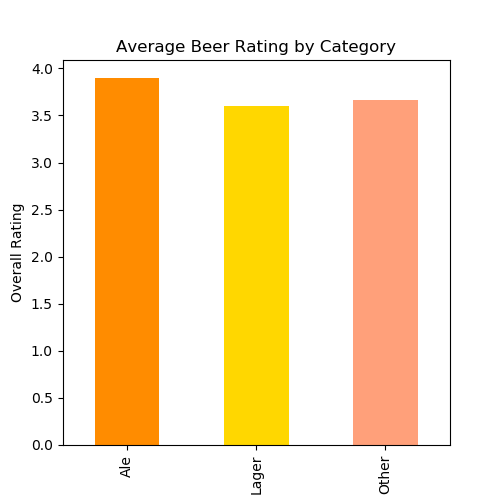

In [20]:
# Create a bar plot using the overall average score for each category of beers
category_rating_chart = grouped_category_mean.plot(kind="bar", color=['darkorange', "gold", "lightsalmon"], 
                                                   figsize=(5,5))
category_rating_chart.set_xlabel("Beer Category")
category_rating_chart.set_ylabel("Overall Rating")

plt.title("Average Beer Rating by Category")
#plt.savefig("Beer_Mean_Bar_Plot")
plt.show()

In [21]:
# Group beer data by Category and sort by overall review score
grouped_category = beer_data.groupby("Category").apply(lambda x: x.sort_values("review_overall"))
grouped_category.columns
# Drop unnecessry comlumns from data frame for plotting
grouped_category_drop = grouped_category.drop(['brewery_id', 'brewery_name', 'review_time', 'review_profilename', 'beer_style',
       'beer_name', 'beer_abv', 'beer_beerid'], axis=1)



In [22]:
# Keep all Ale rows with overall score of 3.5 or higher
ales_df = grouped_category_drop.drop(["Lager", "Other"])
ales_high_score = ales_df.loc[ales_df["review_overall"] >=3.5]

# Keep all Lager rows with overall score of 3.5 or higher
lagers_df = grouped_category_drop.drop(["Ale", "Other"])
lagers_high_score = lagers_df.loc[lagers_df["review_overall"] >=3.5]

# Keep all "Other" beer rows with overall score of 3.5 or higher
others_df = grouped_category_drop.drop(["Lager", "Ale"])
others_high_score = others_df.loc[others_df["review_overall"] >=3.5]


<IPython.core.display.Javascript object>


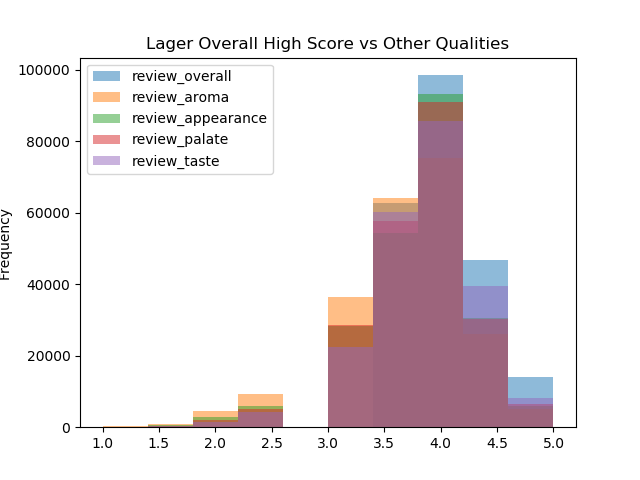

In [23]:
# Plot Lagers beers with high overall scores against the qualities
lagers_high_score.plot.hist(alpha=0.5)
plt.title("Lager Overall High Score vs Other Qualities")
#plt.savefig("Lager_Scores_Hist_plot")
plt.show()

<IPython.core.display.Javascript object>


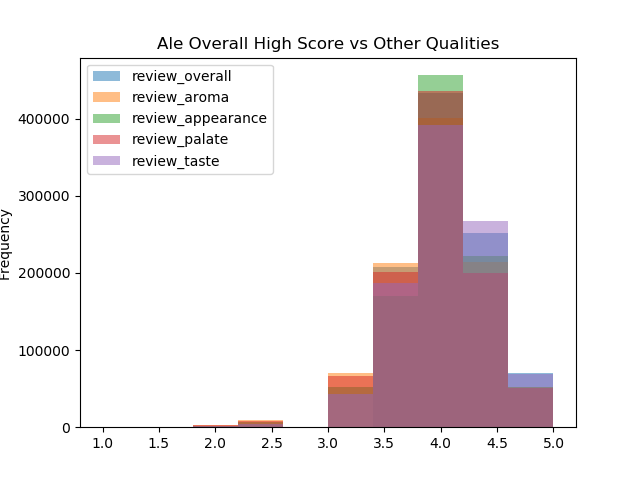

In [24]:
# Plot Ale beers with high overall scores against the qualities
ales_high_score.plot.hist(alpha=0.5)
plt.title("Ale Overall High Score vs Other Qualities")
#plt.savefig("Ale_Scores_Hist_plot")
plt.show()

<IPython.core.display.Javascript object>


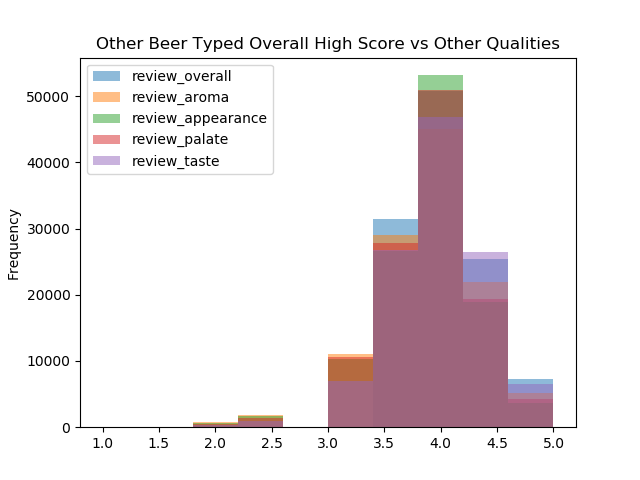

In [25]:
# Plot "Other" beers with high overall scores against the qualities
others_high_score.plot.hist(alpha=0.5)
plt.title("Other Beer Typed Overall High Score vs Other Qualities")
#plt.savefig("Other_Scores_Hist_plot")
plt.show()

<IPython.core.display.Javascript object>


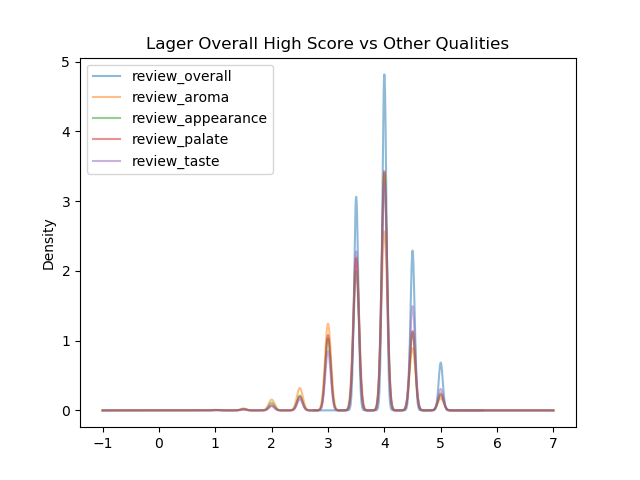

In [26]:
# Plot Lager beers with high overall scores against the qualities
lagers_high_score.plot.kde(alpha=0.5)
plt.title("Lager Overall High Score vs Other Qualities")
#plt.savefig("Lager_Scores_KDE_plot")
plt.show()

<IPython.core.display.Javascript object>


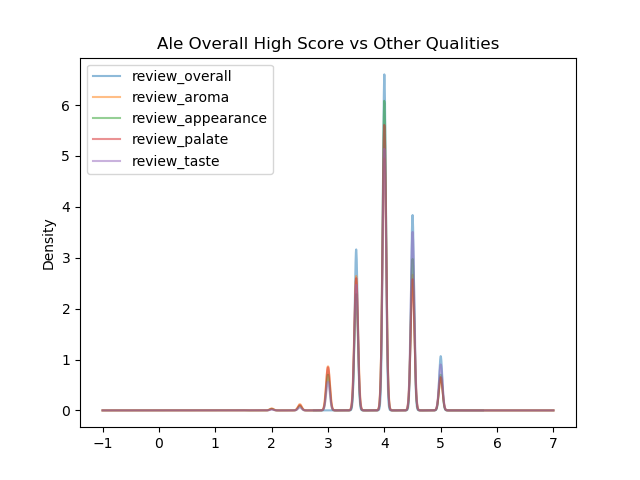

In [27]:
# Plot Ale beers with high overall scores against the qualities
ales_high_score.plot.kde(alpha=0.5)
plt.title("Ale Overall High Score vs Other Qualities")
#plt.savefig("Ale_Scores_KDE_plot")
plt.show()

<IPython.core.display.Javascript object>


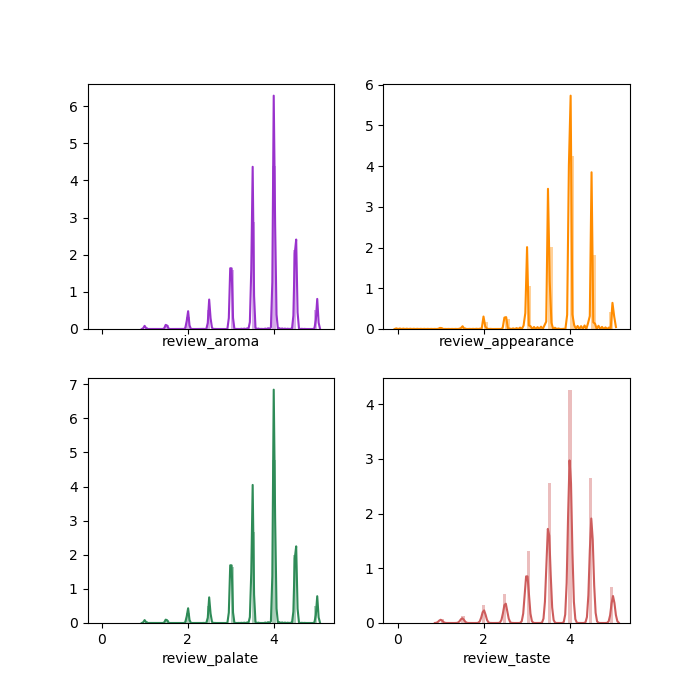

In [28]:
# Seaborn plots of Lager attributes for more resolution

f, axes=plt.subplots(2,2, figsize=(7,7), sharex=True)
#sns.distplot(grouped_category_drop["review_overall"], color="steelblue",ax=axes[0,0])
sns.distplot(grouped_category_drop["review_aroma"], color="darkorchid",ax=axes[0,0])
sns.distplot(grouped_category_drop["review_appearance"], color="darkorange",ax=axes[0,1])
sns.distplot(grouped_category_drop["review_palate"], color="seagreen",ax=axes[1,0])
sns.distplot(grouped_category_drop["review_taste"], color="indianred",ax=axes[1,1])

In [29]:
beer_data.Category

0            Ale
1            Ale
2            Ale
3          Lager
4            Ale
           ...  
1586609      Ale
1586610      Ale
1586611      Ale
1586612      Ale
1586613      Ale
Name: Category, Length: 1586614, dtype: object

In [30]:
ale = beer_data[beer_data.Category == 'Ale']
lager = beer_data[beer_data.Category == 'Lager']


In [31]:
 %matplotlib inline



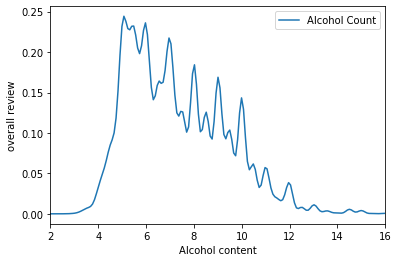

In [32]:
ale = beer_data[beer_data.Category == 'Ale']
lager = beer_data[beer_data.Category == 'Lager']

alcohol_count = ale.beer_abv
alcohol_count_series = pd.Series(alcohol_count)
overall_review = ale.review_overall
overall_review_series = pd.Series(overall_review)
Marketing = {'Alcohol Count': alcohol_count_series, 'Overall Review': overall_review_series}
Marketing_DF = pd.DataFrame(Marketing)
Marketing_DF.plot(kind="kde", x="Overall Review", y="Alcohol Count")
plt.xlim(2,16)
plt.xlabel('Alcohol content')
plt.ylabel('overall review')

plt.show()

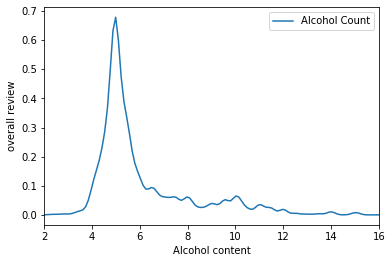

In [33]:

alcohol_count = lager.beer_abv
alcohol_count_series = pd.Series(alcohol_count)
overall_review = lager.review_overall
overall_review_series = pd.Series(overall_review)
Marketing = {'Alcohol Count': alcohol_count_series, 'Overall Review': overall_review_series}
Marketing_DF = pd.DataFrame(Marketing)
Marketing_DF.plot(kind="kde", x="Overall Review", y="Alcohol Count")
plt.xlim(2,16)
plt.xlabel('Alcohol content')
plt.ylabel('overall review')

plt.show()


In [34]:
# Separate Ales from Lagers and Others
beer_data_ale = beer_data[beer_data.Category == "Ale"]
beer_data_ale

# Calculate Character Count
character_count_ale = beer_data_ale['beer_name'].str.len()
character_count_series = pd.Series(character_count_ale)

overall_review_ale = beer_data_ale['review_overall']
overall_review_series = pd.Series(overall_review_ale)

# Character Count Dataframe
marketing_ale = {'Ale Character Count': character_count_series, 'Overall Review': overall_review_series}
marketing_ale_DF = pd.DataFrame(marketing_ale)

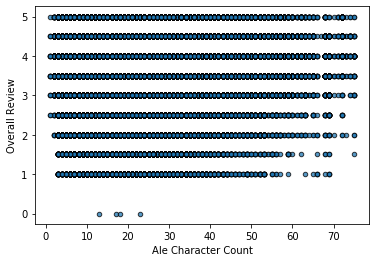

In [35]:
#Plot information for Ale Character Count

marketing_ale_DF.plot.scatter(x='Ale Character Count', y='Overall Review', marker="o", facecolors="red", edgecolors="black",
              s=None, alpha=0.75)
plt.show()
#plt.savefig('Ale_Character_Scatter_01.png')

/Users/arselvargas/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:74: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/arselvargas/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:79: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


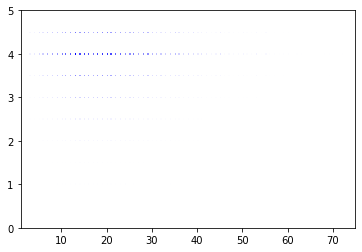

In [36]:
#Plot information for Ale Character Count Density
import mpl_scatter_density
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x = character_count_ale
y = overall_review_ale
ax.scatter_density(x, y, color='blue')

#fig.savefig('Ale_Character_Scatter_Density_1.png')

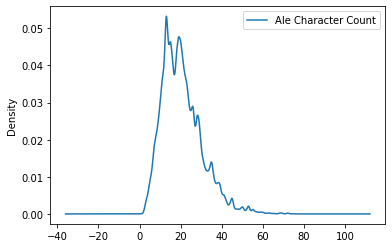

In [37]:
#Plot information for Ale Character Count Density

marketing_ale_DF.plot(kind="kde", x="Overall Review", y="Ale Character Count")

plt.show()
#plt.savefig('Ale_Character_Scatter_Density_2.png')

In [53]:
# Create new DF grouped by brewery
grouped_brewery = beer_data.groupby("brewery_name").apply(lambda x: x.sort_values("brewery_name"))
grouped_brewery.head()

brewery_id       brewery_name  review_time  \
brewery_name                                                           
't Hofbrouwerijke 667015       13160  't Hofbrouwerijke   1293831507   
                  667037       13160  't Hofbrouwerijke   1246915003   
                  667038       13160  't Hofbrouwerijke   1241948945   
                  667039       13160  't Hofbrouwerijke   1234415018   
                  667040       13160  't Hofbrouwerijke   1216432960   

                          review_overall  review_aroma  review_appearance  \
brewery_name                                                                
't Hofbrouwerijke 667015             3.5           4.0                3.0   
                  667037             3.5           3.5                4.0   
                  667038             2.5           4.0                2.0   
                  667039             4.5           3.5                4.5   
                  667040             4.0           4.5                4.0   

                         review_profilename beer_style  review_palate  \
brewery_name                                                            
't Hofbrouwerijke 667015         OttoPeeWee     Tripel            2.5   
                  667037      BuckeyeNation     Tripel            3.5   
                  667038               Suds     Tripel            2.5   
                  667039         bryanbrick     Tripel            4.0   
                  667040            joe1510     Tripel            4.0   

                          review_taste   beer_name  beer_abv  beer_beerid  \
brewery_name                                                                
't Hofbrouwerijke 667015           4.0  Bosprotter       8.5        28810   
                  667037           3.5  Bosprotter       8.5        28810   
                  667038           3.0  Bosprotter       8.5        28810   
                  667039           4.5  Bosprotter       8.5        28810   
                  667040           4.0  Bosprotter       8.5        28810   

                         Category  
brewery_name                       
't Hofbrouwerijke 667015      Ale  
                  667037      Ale  
                  667038      Ale  
                  667039      Ale  
                  667040      Ale

In [54]:
# Count the reviews for each brewery to determine popularity to determin top three
grouped_brewery_count = grouped_brewery["brewery_name"].value_counts()
grouped_brewery_count.head()

Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
Name: brewery_name, dtype: int64

In [55]:
# Get the mean of the overall review score for the top brewery
top_one = beer_data.loc[beer_data["brewery_name"]=="Boston Beer Company (Samuel Adams)"]
top_one_mean = top_one["review_overall"].mean()
top_one_mean

3.689521853767366

In [56]:
# Get the mean of the overall review score for the second top brewery
top_two = beer_data.loc[beer_data["brewery_name"]=="Dogfish Head Brewery"]
top_two_mean = top_two["review_overall"].mean()
top_two_mean

3.836047164514318

In [57]:
# Get the mean of the overall review score for the third top brewery
top_three = beer_data.loc[beer_data["brewery_name"]=="Stone Brewing Co."]
top_three_mean = top_three["review_overall"].mean()
top_three_mean
top_data = [["Boston Beer Company", (top_one_mean),], ["Dogfish Head Brewery", (top_two_mean)], ["Stone Brewing Co.", (top_three_mean)]]
top_combined = pd.DataFrame(top_data, columns = ["Name", "Score"])

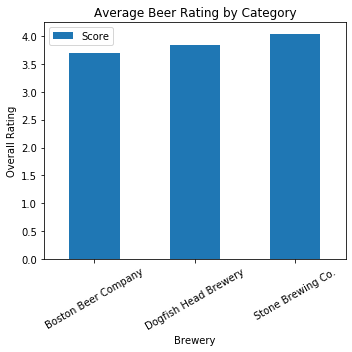

In [58]:
# Plot the top three popular breweries and their overall review score average
top_combined.set_index("Name", drop = True, inplace =True)
top_data_bar = top_combined.plot(kind="bar", figsize=(5,5), rot=30)
top_data_bar.set_xlabel("Brewery")
top_data_bar.set_ylabel("Overall Rating")

plt.title("Average Beer Rating by Category")
plt.tight_layout()
#plt.savefig("Top_Breweries_Bar_Plot")
plt.show()